## Improving the Deep Learning model

In [2]:
# Charging the necessary dependencies
import numpy as np                              # Library for using arrays and numeric calculus
import matplotlib.pyplot as plt                 # Library for plotting 
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
# Charging the data in tensorflow version
npz = np.load('Data_train.npz')
train_inputs = npz['inputs'].astype(float)           # To ensure that they are all floats, let's also take care of that
train_targets = npz['targets'].astype(float)         # Targets are also float values

npz = np.load('Data_test.npz')
test_inputs = npz['inputs'].astype(float)
test_targets = npz['targets'].astype(float)

npz = np.load('Data_valid.npz')
valid_inputs = npz['inputs'].astype(float)
valid_targets = npz['targets'].astype(float)

## Defining a baseline model

In [4]:
# Defining hyperparamters
input_size = 4                  # Set the input and output sizes
output_size = 1
hidden_layer_size = 250
batch_size = 16
max_epochs = 2000
early_stopping = EarlyStopping(patience=60)

# Defining the model architecture
model = Sequential([
    Dense(hidden_layer_size, activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (input_size,)),
    Dense(hidden_layer_size, activation = 'relu', kernel_initializer = 'he_uniform'),
    Dense(hidden_layer_size, activation = 'relu', kernel_initializer = 'he_uniform'),
    Dense(hidden_layer_size, activation = 'relu', kernel_initializer = 'he_uniform'),
    Dense(output_size)
])

# Defining an optimizer
my_optimizer = Adam(learning_rate= 0.0001) # , decay=1e-6
model.compile(optimizer = my_optimizer, loss='mse', metrics=['mae', 'mape'])

In [5]:
with open("model_summary_improved.txt", "w") as f:           # We open a file named "model_summary.txt" in written mode "w" and assigned it to the variable f
    model.summary(print_fn=lambda x: f.write(x +'\n')) # print_fn=lambda, write each line of the summary in the file utilizing the write method 
model.summary()                                     # Prints the model summary


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               1250      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 189,751
Trainable params: 189,751
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Fit the model
checkpointer=ModelCheckpoint(filepath='model_weights_best.hdf5', verbose=2, save_best_only=True)

modelo = model.fit(train_inputs, train_targets, batch_size= batch_size,
                   epochs = max_epochs, callbacks=[checkpointer, early_stopping],
                   validation_data = (valid_inputs, valid_targets),
                   verbose= 0, shuffle=False)


Epoch 00001: val_loss improved from inf to 49.59850, saving model to model_weights_best.hdf5

Epoch 00002: val_loss improved from 49.59850 to 32.83846, saving model to model_weights_best.hdf5

Epoch 00003: val_loss improved from 32.83846 to 26.24872, saving model to model_weights_best.hdf5

Epoch 00004: val_loss improved from 26.24872 to 22.31132, saving model to model_weights_best.hdf5

Epoch 00005: val_loss improved from 22.31132 to 19.34740, saving model to model_weights_best.hdf5

Epoch 00006: val_loss improved from 19.34740 to 16.67727, saving model to model_weights_best.hdf5

Epoch 00007: val_loss improved from 16.67727 to 14.02802, saving model to model_weights_best.hdf5

Epoch 00008: val_loss improved from 14.02802 to 11.42733, saving model to model_weights_best.hdf5

Epoch 00009: val_loss improved from 11.42733 to 8.86360, saving model to model_weights_best.hdf5

Epoch 00010: val_loss improved from 8.86360 to 6.80674, saving model to model_weights_best.hdf5

Epoch 00011: val_

In [7]:
loss = modelo.history['loss']
val_loss = modelo.history['val_loss']
epochs = range (len(loss))

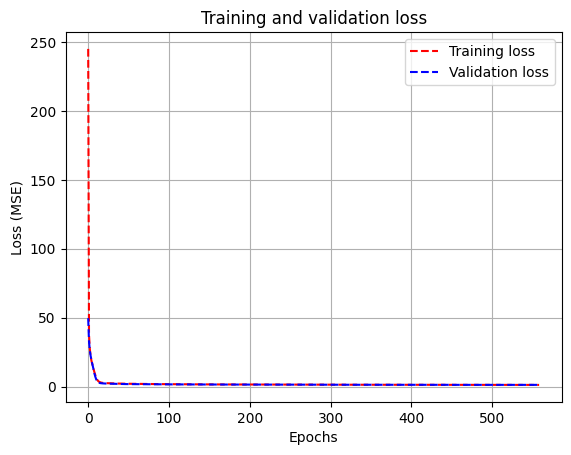

In [8]:
plt.plot(epochs, loss, 'r--', label = 'Training loss')
plt.plot(epochs, val_loss, 'b--', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.savefig("loss_improved.pdf")

In [9]:
# Obtaing the evaluation metrics for the validation instance
valid_loss = model.evaluate(valid_inputs, valid_targets)
valid_loss

13/13 [==============================] - 0s 1ms/step - loss: 1.2722 - mae: 0.7292 - mape: 2.5266


[1.2722396850585938, 0.729217529296875, 2.5266408920288086]

### Checking testing instance

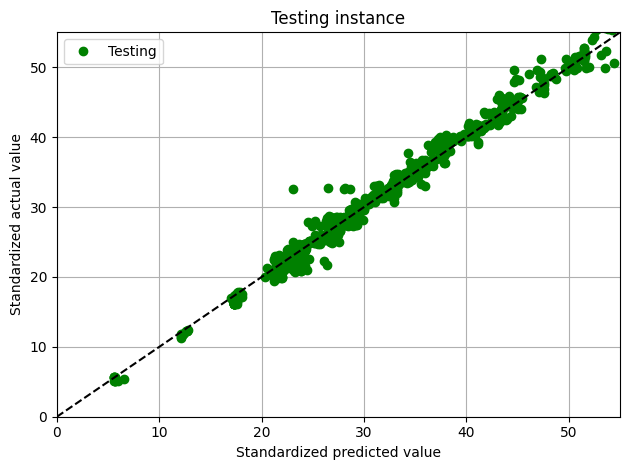

In [10]:
a = model.predict(test_inputs)
plt.plot(a, test_targets, 'go', label = 'Testing')
plt.title('Testing instance')
plt.xlabel('Standardized predicted value')
plt.ylabel('Standardized actual value')
plt.legend()
plt.axis([0, 55, 0, 55])
x = np.linspace(0, 55)
y = x
plt.plot(x, y, 'k--')
# fig = plt.figure.use('seaborn-v0_8', 'paper.mplstyle')
plt.grid()
plt.tight_layout()
plt.savefig("Testing_improved.pdf")

In [11]:
# Testing the model
test_loss = model.evaluate(test_inputs, test_targets)
test_loss

29/29 [==============================] - 0s 1ms/step - loss: 1.1355 - mae: 0.7048 - mape: 2.5273


[1.1354539394378662, 0.7048328518867493, 2.527268409729004]

In [12]:
# Computing the R2 score
r2_score(a, test_targets)

0.9861294309615735